## Step1. Use API to grab data

In [1]:
import requests
import pandas as pd
import numpy as np

'''
Database 

Nutrient      id     unit

protein       203    g/100g
fat           204    g/100g
total_carbon  205    g/100g
energy        208    kcal/100g
sugar         269    g/100g
sodium        307    mg/100g
'''

response1500 = requests.get('https://api.nal.usda.gov/ndb/nutrients/?format=json&api_key=ytzdrrYZCsj8QY4ThsCMxxc5Lo143KWRmCj1BCbX&nutrients=205&nutrients=204&nutrients=208&nutrients=269&nutrients=203&nutrients=307&max=1500', 
                        headers={'Authorization': 'access_token myToken'})
response3000 = requests.get('https://api.nal.usda.gov/ndb/nutrients/?format=json&api_key=ytzdrrYZCsj8QY4ThsCMxxc5Lo143KWRmCj1BCbX&nutrients=205&nutrients=204&nutrients=208&nutrients=269&nutrients=203&nutrients=307&max=1500&offset=1500', 
                        headers={'Authorization': 'access_token myToken'})
response4500 = requests.get('https://api.nal.usda.gov/ndb/nutrients/?format=json&api_key=ytzdrrYZCsj8QY4ThsCMxxc5Lo143KWRmCj1BCbX&nutrients=205&nutrients=204&nutrients=208&nutrients=269&nutrients=203&nutrients=307&max=1500&offset=3000', 
                        headers={'Authorization': 'access_token myToken'})
response6000 = requests.get('https://api.nal.usda.gov/ndb/nutrients/?format=json&api_key=ytzdrrYZCsj8QY4ThsCMxxc5Lo143KWRmCj1BCbX&nutrients=205&nutrients=204&nutrients=208&nutrients=269&nutrients=203&nutrients=307&max=1500&offset=4500', 
                        headers={'Authorization': 'access_token myToken'})
response7500 = requests.get('https://api.nal.usda.gov/ndb/nutrients/?format=json&api_key=ytzdrrYZCsj8QY4ThsCMxxc5Lo143KWRmCj1BCbX&nutrients=205&nutrients=204&nutrients=208&nutrients=269&nutrients=203&nutrients=307&max=1500&offset=6000', 
                        headers={'Authorization': 'access_token myToken'})
response_end = requests.get('https://api.nal.usda.gov/ndb/nutrients/?format=json&api_key=ytzdrrYZCsj8QY4ThsCMxxc5Lo143KWRmCj1BCbX&nutrients=205&nutrients=204&nutrients=208&nutrients=269&nutrients=203&nutrients=307&max=1500&offset=7500', 
                        headers={'Authorization': 'access_token myToken'})

responses = [response1500.json(),response3000.json(),response4500.json(),response6000.json(),response7500.json(),response_end.json()]


In [140]:
# Import package
import warnings
warnings.filterwarnings("ignore")
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

print (__version__) # requires version >= 1.9.0
%matplotlib inline 
#Always run this the command before at the start of notebook
init_notebook_mode(connected=True)
pd.set_option("display.max_rows",40)

2.2.3


## Step2. Transfer the json file to dataframe 

In [142]:
colnames = ['Name','Energy','Sodium','Sugar','Protein','Fat','Carbohydrate']

def gen_df():
    for response in responses: 
        for _, value in response.items():
            v = value
            food = v.get('foods')
            for i in range(len(food)):
                d = [food[i].get('name')]
                d.extend(list(map(lambda x: x.get('gm'),food[i].get('nutrients'))))
                yield d
                
food_df = pd.DataFrame(gen_df(), columns= colnames)

In [143]:
food_df

,Name,Energy,Sodium,Sugar,Protein,Fat,Carbohydrate
0,"Abiyuch, raw",69.0,20,8.55,1.5,0.1,17.6
1,"Acerola juice, raw",23.0,3,4.5,0.4,0.3,4.8
2,"Acerola, (west indian cherry), raw",32.0,7,--,0.4,0.3,7.69
3,"Alcoholic beverage, beer, light",29.0,4,0.09,0.24,0,1.64
4,"Alcoholic beverage, beer, light, BUD LIGHT",29.0,3,--,0.25,0,1.3
5,"Alcoholic beverage, beer, light, BUDWEISER SELECT",28.0,3,--,0.2,0,0.87
6,"Alcoholic beverage, beer, light, higher alcohol",46.0,4,0.09,0.25,0,0.77
7,"Alcoholic beverage, beer, light, low carb",27.0,3,--,0.17,0,0.73
8,"Alcoholic beverage, beer, regular, all",43.0,4,--,0.46,0,3.55
9,"Alcoholic beverage, beer, regular, BUDWEISER",41.0,3,--,0.36,0,2.97


## Step3. Basic exlporing  

- __Create column with higher level catrgory__

In [144]:
name_df = food_df['Name'].str.split(',',4,expand=True).rename(columns=lambda x: f"subcategory_{x+1}")

In [145]:
food_df['Category'] = name_df['subcategory_1']
food_df['Sub_Category1'] = name_df['subcategory_2']
food_df['Sub_Category2'] = name_df['subcategory_3']
food_df['Sub_Category3'] = name_df['subcategory_4']

In [146]:
food_df

,Name,Energy,Sodium,Sugar,Protein,Fat,Carbohydrate,Category,Sub_Category1,Sub_Category2,Sub_Category3
0,"Abiyuch, raw",69.0,20,8.55,1.5,0.1,17.6,Abiyuch,raw,None,None
1,"Acerola juice, raw",23.0,3,4.5,0.4,0.3,4.8,Acerola juice,raw,None,None
2,"Acerola, (west indian cherry), raw",32.0,7,--,0.4,0.3,7.69,Acerola,(west indian cherry),raw,None
3,"Alcoholic beverage, beer, light",29.0,4,0.09,0.24,0,1.64,Alcoholic beverage,beer,light,None
4,"Alcoholic beverage, beer, light, BUD LIGHT",29.0,3,--,0.25,0,1.3,Alcoholic beverage,beer,light,BUD LIGHT
5,"Alcoholic beverage, beer, light, BUDWEISER SELECT",28.0,3,--,0.2,0,0.87,Alcoholic beverage,beer,light,BUDWEISER SELECT
6,"Alcoholic beverage, beer, light, higher alcohol",46.0,4,0.09,0.25,0,0.77,Alcoholic beverage,beer,light,higher alcohol
7,"Alcoholic beverage, beer, light, low carb",27.0,3,--,0.17,0,0.73,Alcoholic beverage,beer,light,low carb
8,"Alcoholic beverage, beer, regular, all",43.0,4,--,0.46,0,3.55,Alcoholic beverage,beer,regular,all
9,"Alcoholic beverage, beer, regular, BUDWEISER",41.0,3,--,0.36,0,2.97,Alcoholic beverage,beer,regular,BUDWEISER


In [147]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7524 entries, 0 to 7523
Data columns (total 11 columns):
Name             7524 non-null object
Energy           7524 non-null float64
Sodium           7524 non-null object
Sugar            7524 non-null object
Protein          7524 non-null object
Fat              7524 non-null object
Carbohydrate     7524 non-null object
Category         7524 non-null object
Sub_Category1    7430 non-null object
Sub_Category2    6522 non-null object
Sub_Category3    4969 non-null object
dtypes: float64(1), object(10)
memory usage: 646.7+ KB


- __See the number of foods we have in the list__
  - 876 foods

In [148]:
food_df.groupby('Category').size().sort_values(ascending = False)

Category
Beef                                                959
Pork                                                324
Lamb                                                292
Beverages                                           273
Babyfood                                            234
Chicken                                             204
Fish                                                199
Soup                                                163
Snacks                                              143
Candies                                             134
Cereals ready-to-eat                                108
Veal                                                108
Turkey                                              107
Beans                                               106
Nuts                                                 89
Infant formula                                       88
Cereals                                              81
Cheese                                 

## Step3. Basic visulization

In [72]:
def nutrientplot_energy(df, value):
    import seaborn as sns
    %pylab inline
    pylab.rcParams['figure.figsize'] = (10, 6)
    x = df[value].dropna()
    x =[float(i) for i in pd.Series.tolist(x)]
    sns.distplot(x, rug=True);

In [73]:
def nutrientplot(df, value):
    import seaborn as sns
    %pylab inline
    pylab.rcParams['figure.figsize'] = (10, 6)
    x = df[df[value] != '--'][value].dropna()
    x =[float(i) for i in pd.Series.tolist(x)]
    sns.distplot(x, rug=True);

Populating the interactive namespace from numpy and matplotlib


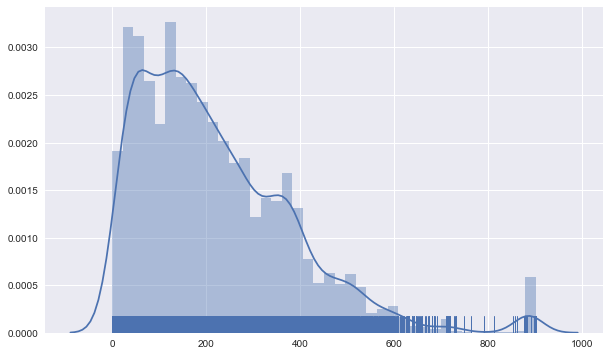

In [137]:
import seaborn as sns
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
x = food_df.ix[:,1].dropna()

x =[float(i) for i in pd.Series.tolist(x)]
sns.distplot(x, rug=True)

Populating the interactive namespace from numpy and matplotlib


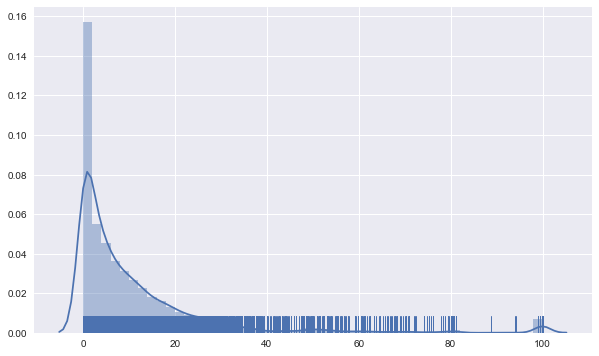

In [138]:
nutrientplot(food_df, 'Fat')

In [149]:
beef_df = food_df.loc[food_df['Category']=='Beef']
pork_df = food_df.loc[food_df['Category']=='Pork']

In [150]:
beef_df

,Name,Energy,Sodium,Sugar,Protein,Fat,Carbohydrate,Category,Sub_Category1,Sub_Category2,Sub_Category3
565,"Beef, Australian, imported, grass-fed, extern...",509.0,36,0,11.32,51.36,0.39,Beef,Australian,imported,grass-fed
566,"Beef, Australian, imported, grass-fed, ground,...",239.0,62,--,17.72,18.12,0,Beef,Australian,imported,grass-fed
567,"Beef, Australian, imported, grass-fed, loin, t...",151.0,62,0,20.53,7.63,0.01,Beef,Australian,imported,grass-fed
568,"Beef, Australian, imported, grass-fed, loin, t...",138.0,63,--,20.85,6.11,0,Beef,Australian,imported,grass-fed
569,"Beef, Australian, imported, grass-fed, loin, t...",199.0,60,0,19.9,13.17,0.11,Beef,Australian,imported,grass-fed
570,"Beef, Australian, imported, grass-fed, loin, t...",131.0,66,--,21.79,4.87,0,Beef,Australian,imported,grass-fed
571,"Beef, Australian, imported, grass-fed, loin, t...",127.0,59,0,21.77,4.45,0.01,Beef,Australian,imported,grass-fed
572,"Beef, Australian, imported, grass-fed, loin, t...",122.0,60,--,21.9,3.87,0,Beef,Australian,imported,grass-fed
573,"Beef, Australian, imported, grass-fed, rib, ri...",217.0,60,0,19.8,15.21,0.11,Beef,Australian,imported,grass-fed
574,"Beef, Australian, imported, grass-fed, rib, ri...",160.0,65,--,21.47,8.2,0,Beef,Australian,imported,grass-fed


Populating the interactive namespace from numpy and matplotlib


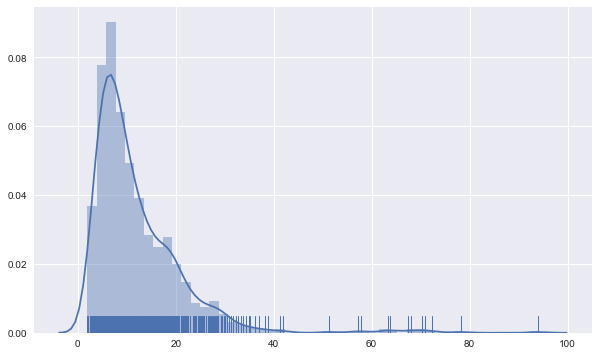

In [135]:
nutrientplot(beef_df, 'Fat')

Populating the interactive namespace from numpy and matplotlib


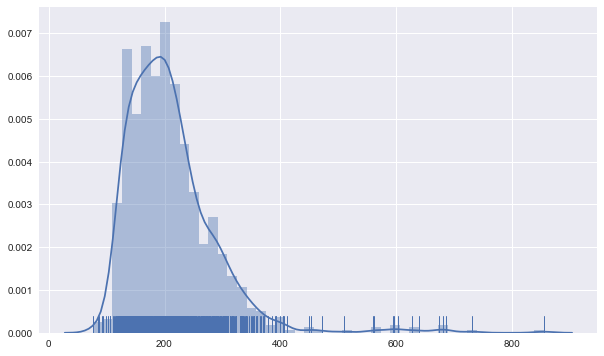

In [134]:
nutrientplot_energy(beef_df, 'Energy')

Populating the interactive namespace from numpy and matplotlib


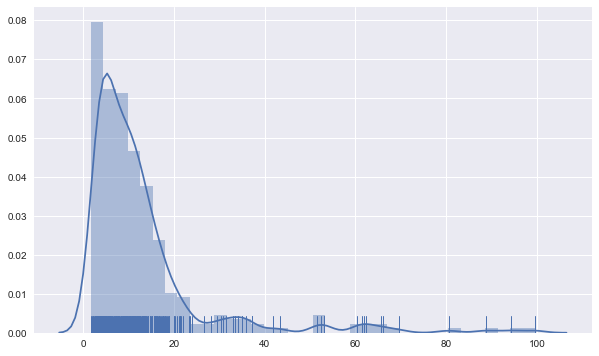

In [132]:
nutrientplot(pork_df, 'Fat')

Populating the interactive namespace from numpy and matplotlib


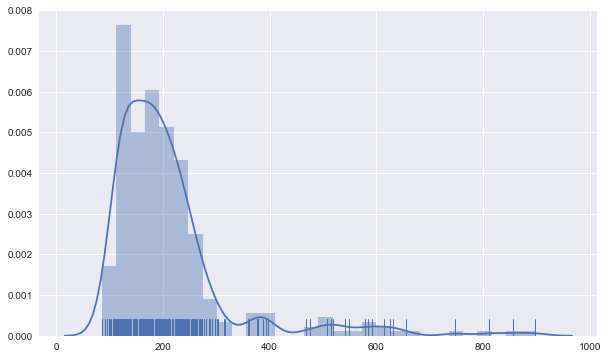

In [133]:
nutrientplot_energy(pork_df, 'Energy')

In [79]:
import scipy

x = pork_df['Energy']
x =[int(i) for i in pd.Series.tolist(x)]
    
y = beef_df['Energy']
y =[int(i) for i in pd.Series.tolist(y)]


scipy.stats.mannwhitneyu(x,y)

MannwhitneyuResult(statistic=136178.0, pvalue=0.00043991602424106043)

In [81]:
print ("Pork has on average "+ str(round(np.mean(x))) + " calories while beef only " + str(round(np.mean(y))) + "calories!")

Strawberry yogurt has much higher calorific value than plain yougurt!
Pork has on average 212.0 calories whilebeefonly 211.0calories!


In [151]:
Yogurt_df = food_df.loc[food_df['Category']=='Yogurt']

In [152]:
Yogurt_df

,Name,Energy,Sodium,Sugar,Protein,Fat,Carbohydrate,Category,Sub_Category1,Sub_Category2,Sub_Category3
7492,"Yogurt, chocolate, nonfat milk",112.0,135,14.97,3.53,0,23.53,Yogurt,chocolate,nonfat milk,None
7493,"Yogurt, chocolate, nonfat milk, fortified with...",112.0,135,14.97,3.53,0,23.53,Yogurt,chocolate,nonfat milk,fortified with vitamin D
7494,"Yogurt, frozen, flavors not chocolate, nonfat ...",104.0,81,12.61,4.4,0.8,19.7,Yogurt,frozen,flavors not chocolate,nonfat milk
7495,"Yogurt, fruit variety, nonfat",95.0,58,--,4.4,0.2,19,Yogurt,fruit variety,nonfat,None
7496,"Yogurt, fruit variety, nonfat, fortified with ...",95.0,58,--,4.4,0.2,19,Yogurt,fruit variety,nonfat,fortified with vitamin D
7497,"Yogurt, fruit, low fat, 10 grams protein per 8...",102.0,58,--,4.37,1.08,19.05,Yogurt,fruit,low fat,10 grams protein per 8 ounce
7498,"Yogurt, fruit, low fat, 10 grams protein per 8...",102.0,58,--,4.37,1.08,19.05,Yogurt,fruit,low fat,10 grams protein per 8 ounce
7499,"Yogurt, fruit, low fat, 11g protein/8 oz",105.0,65,--,4.86,1.41,18.6,Yogurt,fruit,low fat,11g protein/8 oz
7500,"Yogurt, fruit, low fat, 9 grams protein per 8 ...",99.0,53,--,3.98,1.15,18.64,Yogurt,fruit,low fat,9 grams protein per 8 ounce
7501,"Yogurt, fruit, low fat,9 g protein/8 oz",99.0,53,--,3.98,1.15,18.64,Yogurt,fruit,low fat,9 g protein/8 oz


In [104]:
Yogurt_df.groupby(['Sub_Category1','Sub_Category2','Sub_Category3'], as_index = False).agg(['mean','max','median','count'])

Energy  \
                                                                                                     mean   
Sub_Category1            Sub_Category2          Sub_Category3                                               
 Greek                    nonfat                 strawberry                                          84.0   
                                                 vanilla                                             78.0   
                          plain                  lowfat                                              73.0   
                                                 nonfat (Includes foods for USDA's Food Distrib...   59.0   
                          strawberry             DANNON OIKOS                                       106.0   
                                                 lowfat                                             105.0   
                                                 nonfat                                              82.0   
                          vanilla                nonfat                                              78.0   
 chocolate                nonfat milk            fortified with vitamin D                           112.0   
 frozen                   flavors not chocolate  nonfat milk                                        104.0   
 fruit                    low fat                10 grams protein per 8 ounce                       102.0   
                                                 11g protein/8 oz                                   105.0   
                                                 9 grams protein per 8 ounce                         99.0   
                                                9 g protein/8 oz                                     99.0   
                          lowfat                 with low calorie sweetener                         105.0   
 fruit variety            nonfat                 fortified with vitamin D                            95.0   
 vanilla                  low fat                fortified with vitamin D                            85.0   
 vanilla flavor           lowfat milk            sweetened with low calorie sweetener                86.0   
 vanilla or lemon flavor  nonfat milk            sweetened with low-calorie sweetener                43.0   

                                                                                                           \
                                                                                                      max   
Sub_Category1            Sub_Category2          Sub_Category3                                               
 Greek                    nonfat                 strawberry                                          84.0   
                                                 vanilla                                             85.0   
                          plain                  lowfat                                              73.0   
                                                 nonfat (Includes foods for USDA's Food Distrib...   59.0   
                          strawberry             DANNON OIKOS                                       106.0   
                                                 lowfat                                             105.0   
                                                 nonfat                                              82.0   
                          vanilla                nonfat                                              78.0   
 chocolate                nonfat milk            fortified with vitamin D                           112.0   
 frozen                   flavors not chocolate  nonfat milk                                        104.0   
 fruit                    low fat                10 grams protein per 8 ounce                       102.0   
                                                 11g protein/8 oz                                   105.0   
                                                 9 grams protein 

In [110]:
yogurt_energy = Yogurt_df.groupby(['Sub_Category1','Sub_Category2'], as_index = False).mean()

In [130]:
trace1 = go.Bar(x=yogurt_energy.Sub_Category1 + yogurt_energy.Sub_Category2, y=yogurt_energy.Energy,name="Energy") 
data=go.Data([trace1])
layout=go.Layout(title="Calorie over different yogurts", xaxis={'title':'Yogurt'}, yaxis={'title':'Calorie per 100gm'})
figure=go.Figure(data=data,layout=layout)
iplot(figure, filename='fig4')                                                 

In [117]:
beef_energy = beef_df.groupby(['Sub_Category1','Sub_Category2'], as_index = False).mean()

In [131]:
trace1 = go.Bar(x=beef_energy.Sub_Category1 + beef_energy.Sub_Category2, y=beef_energy.Energy,name="Energy") 
data=go.Data([trace1])
layout=go.Layout(title="Calorie over different beef", xaxis={'title':'Beef'}, yaxis={'title':'Calorie per 100gm'})
figure=go.Figure(data=data,layout=layout)
iplot(figure, filename='fig5')  